In [1]:
import pandas
import os.path
from glob import glob
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from matplotlib.colors import Normalize
from matplotlib.ticker import MaxNLocator
from matplotlib.colors import LogNorm
from matplotlib.patches import Patch
from matplotlib.lines import Line2D




In [2]:
#Uvozimo tabele
paths = glob("data/tables/*.csv")
league_paths = [paths[0:4], paths[4:9], paths[9:13], paths[13:17], paths[17:]]
leagues = ["bundesliga", "laliga", "ligue 1", "premier league", "serie a"]

#Iz tabel izluščimo prednost prvouvščenega in njegovo povprečje točk na tekmo
result = pandas.DataFrame({"League": [], "PTS Difference" : [], "Points Per Game" : []})
for league, name in zip(league_paths, leagues):
    for el in league:
        tabela = pandas.read_csv(el, index_col = 0)
        pts_diff = tabela.iloc[0]["PTS"] - tabela.iloc[1]["PTS"]
        ppg = tabela.iloc[0]["PTS"]/(tabela.iloc[0]["Wins"] + tabela.iloc[0]["Losses"] + tabela.iloc[0]["Draws"])
        new_row = {"League" : name, "PTS Difference" : pts_diff, "Points Per Game" : ppg}
        result = result.append(new_row, ignore_index=True)
result

,League,PTS Difference,Points Per Game
0,bundesliga,6.0,2.400000
1,bundesliga,21.0,2.470588
2,bundesliga,2.0,2.294118
3,bundesliga,13.0,2.411765
4,laliga,1.0,2.394737
5,laliga,3.0,2.447368
6,laliga,14.0,2.447368
7,laliga,11.0,2.289474
8,laliga,5.0,2.289474
9,ligue 1,31.0,2.526316


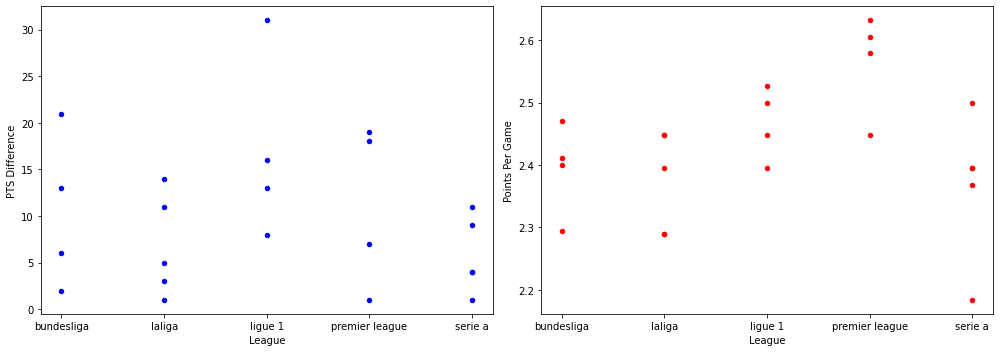

In [3]:
# Funkcija nariše grafa točkovne prednosti prvouvrščenega in njegovega povprečja 
# točk na tekmo, glede na ligo
def graphs_1(data):
    _, (ax_1, ax_2) = plt.subplots(1, 2, figsize = (14, 5))
    data.plot.scatter("League", "PTS Difference", ax = ax_1, color = "blue")
    data.plot.scatter("League", "Points Per Game", ax = ax_2, color = "red")
    plt.tight_layout()

graphs_1(result)

Levi graf prikazuje prednost prvouvrščenega pred naslednjim zasledovalcem na koncu sezone, desni graf pa prikazuje povprečje točk na tekmo prvouvrščenega. Velika razlika med 1. in 2. mestom nakazuje, da je bila ena ekipa izrazito boljša od konkurence. Število točk na tekmo pa je boljši pokazatelj kvalitete, saj je neodvisen od drugouvrščenega, ampak od celotne lige. Grafa nam data okvirno idejo kvalitete različnih klubov v ligi. Kot primer si poglejmo angleško Premier ligo in francosko Ligue 1. V angleški ligi opazimo višje povprečje točk na tekmo zmagovalca, med tem ko v francoski ligi opazimo višjo razliko med zmagovalcem in drugouvrščenim. Iz tega lahko sklepamo, da so v francoski ligi "povprečni klubi" bolj izenačeni, vodilnemu pa zato zadostuje manjša učinkovitost, da doseže enak ali večji naskok pred drugouvrščenim. Izpostavimo pa tudi to, da sta načeloma oba podatka med seboj povezana. Iz večje učinkovitosti sledi večje skupno število točk, in tako večja verjetnost za večjo prednost na vrhu lestvice.

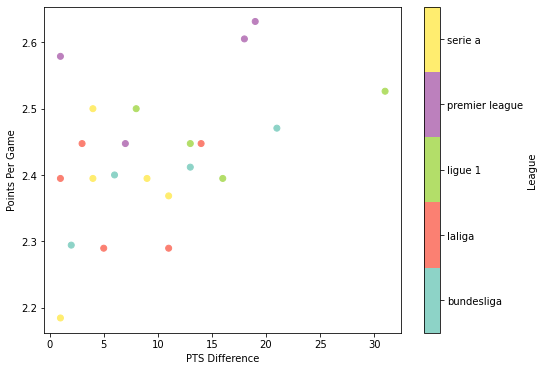

In [4]:
league_dict = {"bundesliga" : 1, "laliga" : 2, "ligue 1" : 3, "premier league" : 4, "serie a" : 5}
# Funkcija, ki nariše graf
def graph_1_colors(data):
    x = data["PTS Difference"].tolist()
    y = data["Points Per Game"].tolist()
    c = [league_dict[x] for x in result["League"].tolist()]             # Za barve
    f = plt.figure()
    f.set_figwidth(8)                                                   # Velikost
    f.set_figheight(6)
    plt.scatter(x, y, c = c, cmap = plt.cm.get_cmap("Set3", 5))         # Točke
    cbar = plt.colorbar(orientation = "vertical")                       # Legenda
    cbar.set_label(label="League")
    cbar.set_ticks([1.4, 2.2, 3, 3.8, 4.6])
    cbar.set_ticklabels(["bundesliga", "laliga", "ligue 1", "premier league", "serie a"])
    plt.xlabel("PTS Difference")                                        # Oznake osi
    plt.ylabel("Points Per Game")
    plt.show()
graph_1_colors(result)

Zgornji graf prikazuje prednost in točke na tekmo prvouvrščenih v različnih sezonah. Vsaka barva predstavlja različno ligo. Na prvi pogled ni videti pravega vzorca, in mislim da je smiselno trditi, da med ligami ni velikih razlik. Zares izstopajo 3 vnosi. Najzanimivejši vnos pa je skrajno leva zgornja točka. Gre za sezono 2018-2019, ko je Manchester City za las osvojil naslov. Kljub odličnem povprečju točk na tekmo so imeli pred prvim zasledovalcem (Liverpool) le točko prednosti. 

<AxesSubplot:xlabel='League', ylabel='Goals per Game'>

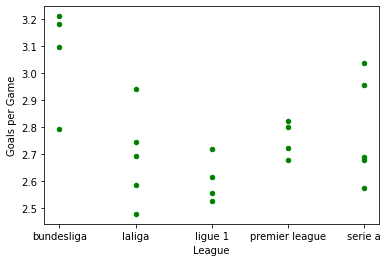

In [5]:
# Seznam seznamov, ki vsebujejo poti do .csv datotek
paths_2 = glob("data/input/*.csv")
league_paths_2 = [paths_2[0:4], paths_2[4:9], paths_2[9:13], paths_2[13:17], paths_2[17:]]

# Zanka ustvari tabelo z goli na tekmo, v vsaki iteraciji eno vrstico
result_2 = pandas.DataFrame({"League": [], "Goals per Game" : []})
for league, name in zip(league_paths_2, leagues):
    for el in league:
        tabela = pandas.read_csv(el, index_col = 0)
        gpg = tabela["goals"].mean() + tabela["opponent goals"].mean()
        new_row = {"League" : name, "Goals per Game" : gpg}
        result_2 = result_2.append(new_row, ignore_index=True)
        
# Narišemo graf
result_2.plot.scatter("League", "Goals per Game", color = "green")

Zgornji graf prikazuje povprečje golov na tekmo v posameznih ligah (vsaka točka predstavlja drugo sezono). Po pričakovanjih lahko opazimo razlike, v nemški ligi je povprečje golov precej višje kot v ostalih ligah, v angleški Premier ligi pa je najbolj konstantno. Treba je omeniti, da število golov na tekmo ne nakazuje razlike v kvaliteti, temveč predvsem v stilu igre. V Nemčiji, kjer ekipe dosegajo več golov na tekmo, lahko sklepamo, da je bolj popularen agresiven in napadalen stil igre, ki omogoča več doseženih golov (hkrati pa ekipe tudi bolj izpostavi protinapadom in prejetim zadetkom).

In [6]:
# Vzorčna tabela s korelacijskimi koeficienti (po Pearsonovi metodi)
example = pandas.read_csv("tables/bundesliga-2018-2019.csv")
corr_pearson = example.corr(method = "pearson")
corr_pearson

FileNotFoundError: [Errno 2] No such file or directory: 'tables/bundesliga-2018-2019.csv'

In [ ]:
# Tabela s korelacijskimi koeficienti (po Spearmanovi metodi)
corr_spearman = example.corr(method = "spearman")
corr_spearman

,PTS,Goal Difference,Goals,Goals against,Wins,Draws,Losses
PTS,1.000000,0.954522,0.912099,-0.903259,0.996893,-0.261416,-0.912571
Goal Difference,0.954522,1.000000,0.940569,-0.894520,0.939931,-0.085872,-0.952948
Goals,0.912099,0.940569,1.000000,-0.774961,0.910365,-0.124683,-0.906363
Goals against,-0.903259,-0.894520,-0.774961,1.000000,-0.890100,-0.012055,0.912526
Wins,0.996893,0.939931,0.910365,-0.890100,1.000000,-0.301856,-0.895284
Draws,-0.261416,-0.085872,-0.124683,-0.012055,-0.301856,1.000000,-0.102733
Losses,-0.912571,-0.952948,-0.906363,0.912526,-0.895284,-0.102733,1.000000


Zgornji tabeli prikazujeta korelacijske koeficiente med izbranimi statističnimi kategorijami, izračunani po Pearsonovi (zgornja tabela) in Spearmanovi metodi (spodnja tabela). Za vzorec sem izbral nemško Bundesligo, in sicer sezono 2018/2019 (po naključju). Zanima me, kako so te statistične kategorije povezane med seboj. Po pričakovanjih vidimo, da so dosežene točke skoraj linearno odvisne od števila zmag (čeprav tudi remiji prinesejo eno točko). Ko smo ravno pri remijih, opazimo, da kar precej negativno vplivajo na število točk, čeprav prinesejo ekipi eno točko, saj ekipa ob remiju "zamudi zmago" in tako ne pridobi potencialnih 3 točk. Izmed vsega pa me najbolj zanima slednje; doseženi in prejeti goli imajo seveda ravno nasproten vpliv na število točk. Ali je mogoče, da vpliva nista nasprotno enaka, torej da ima ena izmed kategorij večji vpliv na število točk kot druga?

Za bolj koristne informacije bom naredil eno tabelo korelacijskih koeficientov (kot prikazano zgoraj) za vsako sezono, nato pa korelacijske koeficiente primerjal in izračunal povprečja. Tako bom dobil odgovor na moje vprašanje.

In [ ]:
#Dve tabeli s korelacijskimi koeficienti izbranih kategorij za vsako sezono
result_pearson = pandas.DataFrame({"League": [], "Goals/PTS" : [], "Goals Against/PTS" : [], \
    "Wins/PTS" : [], "Draws/PTS" : [], "Losses/PTS" : []})
result_spearman = pandas.DataFrame({"League": [], "Goals/PTS" : [], "Goals Against/PTS" : [], \
    "Wins/PTS" : [], "Draws/PTS" : [], "Losses/PTS" : []})
for league, name in zip(league_paths, leagues):
    for el in league:
        tabela = pandas.read_csv(el, index_col = 0)
        corr_pearson = tabela.corr(method = "pearson")
        corr_spearman = tabela.corr(method = "spearman")
        new_row_pearson = {"League": name, "Goals/PTS" : corr_pearson.at["Goals", "PTS"], \
            "Goals Against/PTS" : corr_pearson.at["Goals against", "PTS"], "Wins/PTS" : corr_pearson.at["Wins", "PTS"], \
            "Draws/PTS" : corr_pearson.at["Draws", "PTS"], "Losses/PTS" : corr_pearson.at["Losses", "PTS"]}
        new_row_spearman = {"League": name, "Goals/PTS" : corr_spearman.at["Goals", "PTS"], \
            "Goals Against/PTS" : corr_spearman.at["Goals against", "PTS"], "Wins/PTS" : corr_spearman.at["Wins", "PTS"], \
            "Draws/PTS" : corr_spearman.at["Draws", "PTS"], "Losses/PTS" : corr_spearman.at["Losses", "PTS"]}
        result_pearson = result_pearson.append(new_row_pearson, ignore_index=True)
        result_spearman = result_spearman.append(new_row_spearman, ignore_index=True)


interactive(children=(Dropdown(description='stat', options=('Draws/PTS', 'Losses/PTS'), value='Draws/PTS'), Ou…

<function __main__.grafi_corr(stat)>

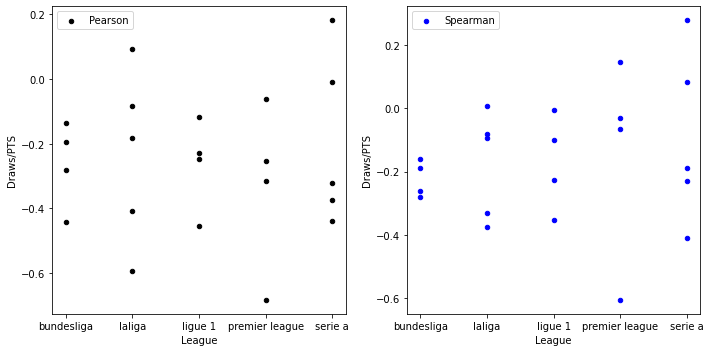

In [ ]:
# Funkcija nariše dva interaktivna grafa korelacijskih koeficientov
def grafi_corr(stat):
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5)) 
    result_pearson.plot.scatter('League', stat, color = 'black', ax=ax1, label = 'Pearson')
    result_spearman.plot.scatter('League', stat, color = 'blue', ax=ax2, label = 'Spearman')
    plt.tight_layout()

widgets.interact(grafi_corr, stat=list(result_pearson)[1:])

Zgornja grafa prikazujeta korelacijske koeficiente po Pearsonovi (levi) in Spearmanovi metodi (desni). Opazimo precej zanimive stvari; korelacija golov na tekmo (in podobno prejetih golov) ter skupnega števila doseženih točk je precej različna od sezone do sezone. Koerlacija med zmagami in točkami je skoraj popolnoma linearna, vsi vnosi pa se nahajajo na intervalu med 0.98 in 1, kar daje precej konsistentne rezultate in iz tega lahko zaključimo, da zmage skoraj neposredno določajo število doseženih točk, čeprav tudi remiji prinesejo točko. Morda najbolj zanimiva je korelacija med remiji in točkami. Zajema namreč ogromen razpon vrednosti, od skoraj -0.7, do 0.2. Težko je sklepati, kakšen vpliv imajo remiji na končno število točk, če sploh ne moremo trditi, da je vpliv pozitiven oz. negativen.

C:\Users\jureb\AppData\Local\Temp/ipykernel_14432/132245744.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean_p = result_pearson.mean(axis=0).tolist()
C:\Users\jureb\AppData\Local\Temp/ipykernel_14432/132245744.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean_s = result_spearman.mean(axis=0).tolist()


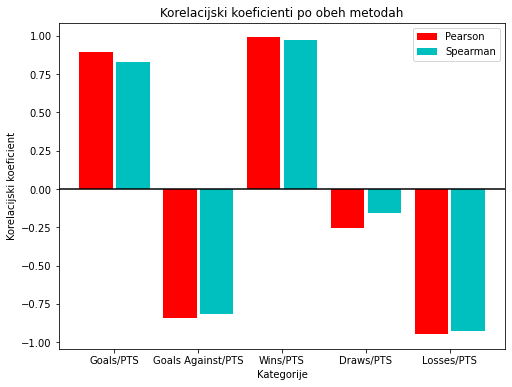

In [ ]:
# Narišemo graf s povprečji korelacijskih koeficientov
def grafi_corr_avg(pear, spear):
    mean_p = pear.mean(axis=0).tolist()                                         # Izračuna seznam povprečij
    mean_s = spear.mean(axis=0).tolist()
    stats = list(pear)[1:]
    plt.figure(figsize=(8,6))                                                   # Velikost grafa
    xpos = np.arange(len(stats))                                                # Za zamik stolpcev na grafu, vir: https://www.youtube.com/watch?v=iedmZlFxjfA
    plt.xticks(xpos, stats)
    plt.axhline(y=0, color='black', linestyle='-')
    plt.bar(xpos-0.22, mean_p, label = "Pearson", width = 0.4, color = "r")     # Nariše stolpce
    plt.bar(xpos+0.22, mean_s, label = "Spearman", width = 0.4, color = "c")
    plt.title("Korelacijski koeficienti po obeh metodah")                       # Oznake
    plt.xlabel("Kategorije")
    plt.ylabel("Korelacijski koeficient")
    plt.legend()
    plt.show()

grafi_corr_avg(result_pearson, result_spearman)

Zgornji graf prikazuje povprečne korelacijske koeficiente med posameznimi kategorijami. Poleg tega pa lahko dobro vidimo, da obe metodi vrneta različne rezultate. Zastavil sem si vprašanje, ali imajo doseženi zadetki nasprotno enak vpliv na število točk, ali pa je morda med vplivoma večja razlika. Rezultati kažejo, da ni velike razlike med vplivoma, poleg tega da sta nasprotna, je pa vpliv doseženih golov malce večji kot vpliv prejetih. Slednje si razlagam na sledeči način: Za doseganje točk so doseženi zadetki nujno potrebni in ni dovolj le, da je prejetih zadetkov malo (saj za zmago ekipa prejme 3 točke, za remi le eno, poraz pa ne prinese ničesar).